In [50]:
import numpy as np
import matplotlib.pyplot as plt

from hopfiled import HopfieldNet, preprocesar
from PIL import Image



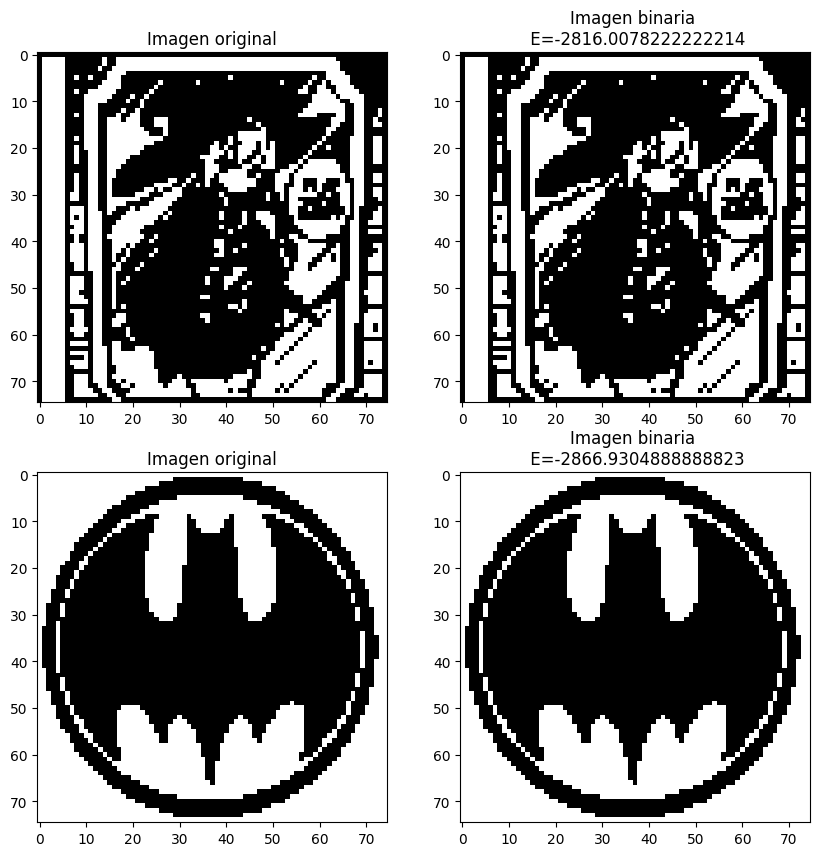

In [61]:



pattern1 = preprocesar('azuza.png', umbral=225)
pattern2 = preprocesar('inputs/samir.jpg')
pattern3 = preprocesar('inputs/gato.jpg')
pattern4 = preprocesar('inputs/batman.png', umbral=225)
pattern5 = preprocesar('inputs/superman.jpg', umbral=225)
# Creamos un array con los patrones que queremos que aprenda la red
patterns = [pattern1, pattern2, pattern4]

# Creamos la red de Hopfield
net = HopfieldNet(pattern1.shape)
# Entrenamos la red con los patrones
net.train(patterns)

# Mostamos la imagen
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(pattern1, cmap='gray')
plt.title('Imagen original')
plt.subplot(2, 2, 2)
plt.imshow(pattern1, cmap='gray')
plt.title(f'Imagen binaria \n E={net.energy(pattern1)}')
plt.subplot(2, 2, 3)
plt.imshow(pattern4, cmap='gray')
plt.title('Imagen original')
plt.subplot(2, 2, 4)
plt.imshow(pattern4, cmap='gray')
plt.title(f'Imagen binaria \n E={net.energy(pattern2)}')
plt.show()

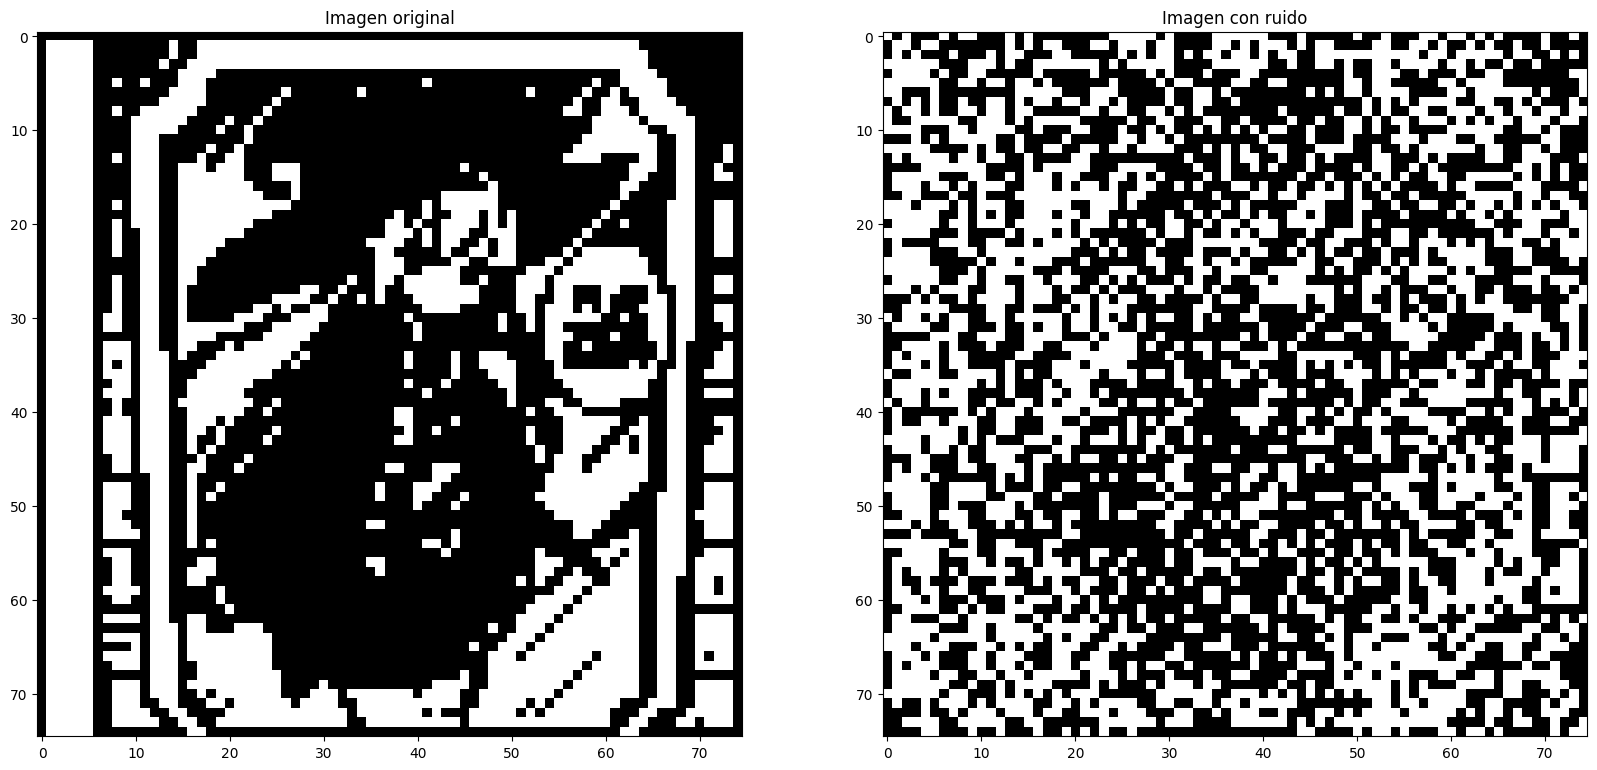

In [62]:
# Generamos un ruido en la imagen
def add_noise(imagen, porcentaje=0.1):
    '''
    Esta función genera un ruido en la imagen, cambiando el valor de los pixeles
    De forma aleatoria, invirtiendo su valor.
    '''
    imagen_ruido = imagen.copy()
    pixeles = imagen.size
    n_ruido = int(pixeles * porcentaje)
    for i in range(n_ruido):
        x = np.random.randint(0, imagen.shape[0])
        y = np.random.randint(0, imagen.shape[1])
        imagen_ruido[x, y] = -imagen_ruido[x, y]
    
    return imagen_ruido

'''
# Con esto podemos generar un ruido en la imagen cortando partes de la imagen
pattern1_noisy = pattern1.copy()
pattern1_noisy[30:75, 10:60] = 1
pattern1_noisy[20:40, 10:40] = 1
pattern1_noisy[30:60, 40:60] = 1
'''
pattern1_noisy = add_noise(pattern1, porcentaje=0.5)

# Mostramos la imagen con ruido
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(pattern1, cmap='gray')
plt.title('Imagen original')
plt.subplot(1, 2, 2)
plt.imshow(pattern1_noisy, cmap='gray')
plt.title('Imagen con ruido')
plt.show()

In [53]:
from IPython.display import clear_output

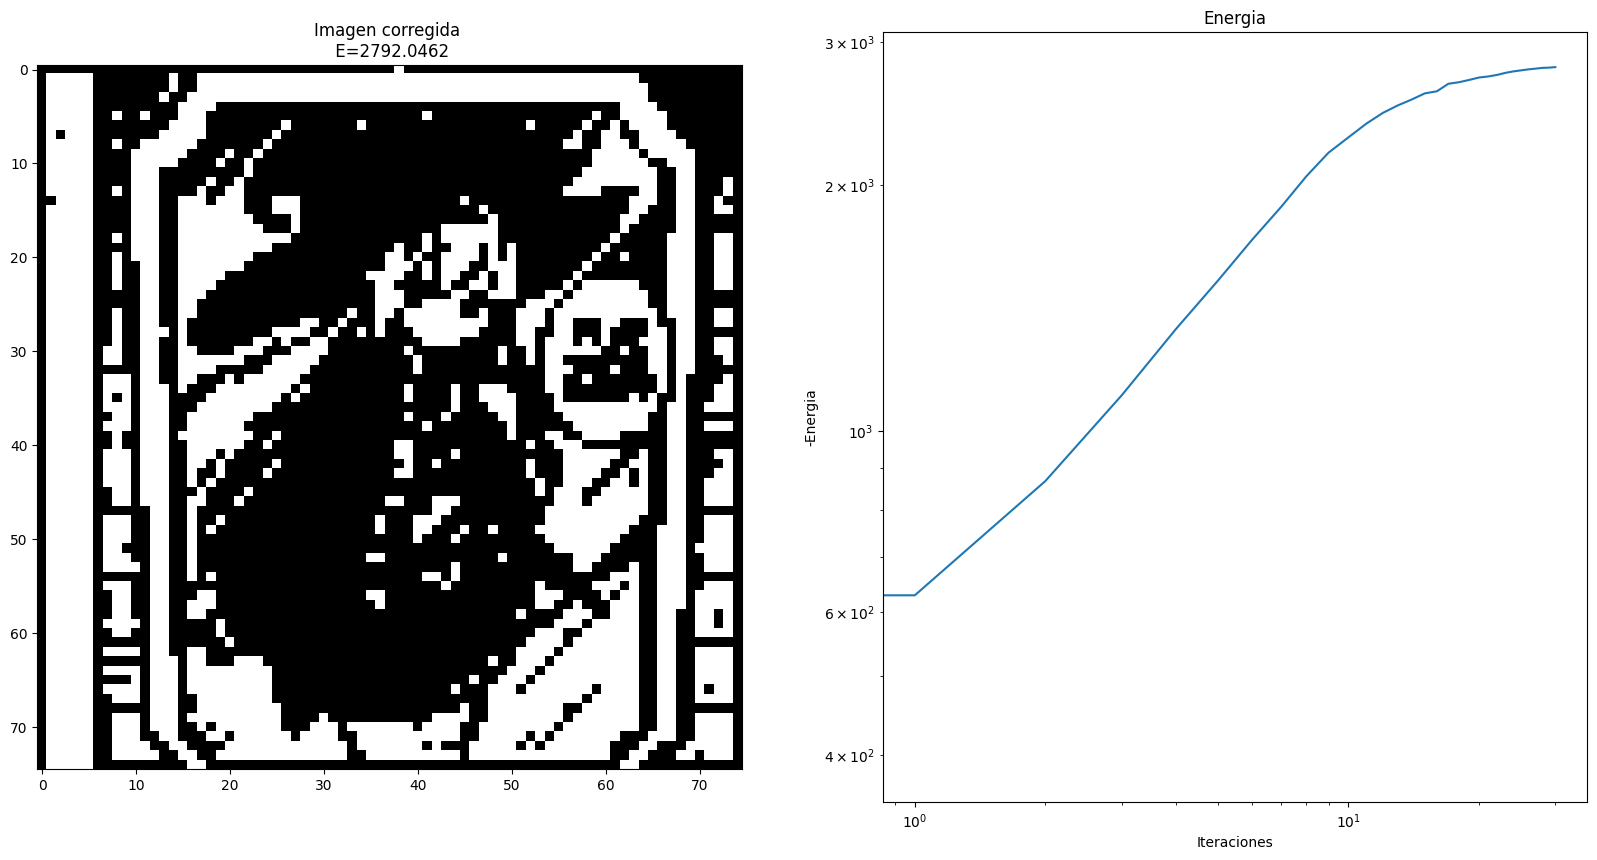

In [64]:
# Corregimos la imagen con ruido usando la red de Hopfield

state = pattern1_noisy.copy()
#state = preprocesar('inputs/superman.jpg')

E = [-net.energy(state)]

for i in range(30):
    state = net.update(state, steps = 1000).reshape(pattern1.shape)
    E.append(-net.energy(state))
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(state, cmap='gray')
    plt.title(f'Imagen corregida \n E={np.round(E[-1], 4)}')
    plt.subplot(1, 2, 2)
    plt.plot(E)
    plt.xlabel('Iteraciones')
    plt.ylabel('-Energia')
    plt.xscale('log')
    plt.yscale('log')  
    plt.title('Energia')
    plt.show()
    clear_output(wait=True)
# Mostramos la imagen corregida
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(state, cmap='gray')
plt.title(f'Imagen corregida \n E={np.round(E[-1], 4)}')
plt.subplot(1, 2, 2)
plt.plot(E)
plt.xlabel('Iteraciones')
plt.ylabel('-Energia')
plt.xscale('log')
plt.yscale('log')  
plt.title('Energia')
plt.show()

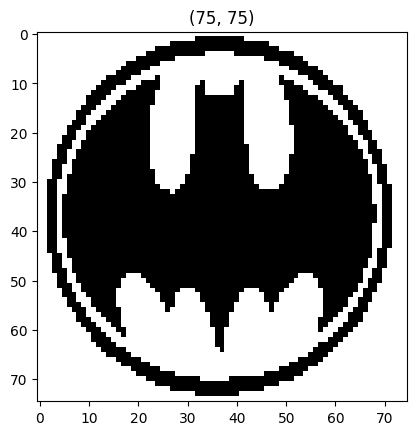

In [55]:
patron1 = preprocesar('inputs/batman.png')

plt.imshow(patron1, cmap='gray')
plt.title(patron1.shape)
plt.show()

In [56]:
net = HopfieldNet(patron1.shape)
net.train([patron1])
